## Final prediction

In [43]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import joblib as jb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [44]:
def flow (x_path,y_path):
    #read
    x_test=pd.read_csv(x_path)
    y_test=pd.read_csv(y_path)
    y_test=y_test.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})
   
   # encode
    encode_data=encode_model.transform(x_test_encode)
    encode_data=pd.DataFrame(encode_data, columns=x_test_encode.columns)
    

    # predcit
    y_pred=pd.DataFrame(model.predict(x_test_encode))
    y_pred=y_pred.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})
    # metrics
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)

In [45]:
    x_test=pd.read_csv('Data/Test/Evaluate/x_test.csv')
    y_test=pd.read_csv('Data/Test/Evaluate/y_test.csv')
    y_test=y_test.replace({'Negative':0,'Positive':1,'Irrelevant':2,'Neutral':3})

## Prediction

In [46]:
model=jb.load('Data/Train/model/rf.pkl')
encode_model=jb.load('Data/Train/Model/x_train_encode_model.pkl')

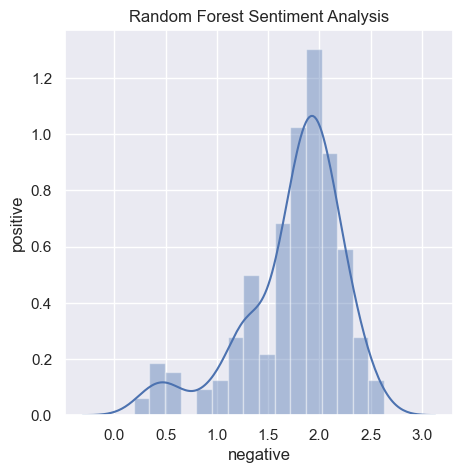

In [47]:
plt.figure(figsize=(5, 5))
sns.distplot(y_pred)
plt.xlabel('negative')
plt.ylabel('positive')
plt.title('Random Forest Sentiment Analysis')
plt.show()